<a href="https://colab.research.google.com/github/mdansarijaved/stockpricepredictor/blob/main/Stockprice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense , Dropout

In [2]:
from google.colab import files
dataset = files.upload()

Saving TSLA.csv to TSLA.csv


In [3]:
df=pd.read_csv('TSLA.csv')

In [4]:
df.shape

(2392, 7)

In [5]:
df=df['Open'].values
df=df.reshape(-1,1)

In [6]:
df.shape

(2392, 1)

In [7]:
dataset_train=np.array(df[:int(df.shape[0]*0.8)])
dataset_test=np.array(df[int(df.shape[0]*0.8):])
print(dataset_train.shape)
print(dataset_test.shape)

(1913, 1)
(479, 1)


In [8]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM , Dense , Dropout


In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
dataset_train=scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.0239104 ],
       [0.01851302],
       [0.01041695],
       [0.00070166],
       [0.        ]])

In [10]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.8340845 ],
       [0.87127243],
       [0.88293085],
       [0.81983541],
       [0.80958041]])

In [22]:
def create_dataset(df):
  x=[]
  y=[]
  
  for i in range(50,df.shape[0]):
    x.append(df[i-50:i,0])
    y.append(df[i,0])
  x=np.array(x)
  y=np.array(y)
  return x,y

In [24]:
x_train,y_train = create_dataset(dataset_train)
x_test,y_test=create_dataset(dataset_test)

In [25]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [26]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [27]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
59/59 [==============================] - 13s 116ms/step - loss: 0.0198
Epoch 2/50
59/59 [==============================] - 7s 115ms/step - loss: 0.0037
Epoch 3/50
59/59 [==============================] - 7s 115ms/step - loss: 0.0040
Epoch 4/50
59/59 [==============================] - 7s 115ms/step - loss: 0.0035
Epoch 5/50
59/59 [==============================] - 7s 115ms/step - loss: 0.0028
Epoch 6/50
59/59 [==============================] - 7s 115ms/step - loss: 0.0028
Epoch 7/50
59/59 [==============================] - 7s 116ms/step - loss: 0.0025
Epoch 8/50
59/59 [==============================] - 7s 115ms/step - loss: 0.0025
Epoch 9/50
59/59 [==============================] - 7s 116ms/step - loss: 0.0023
Epoch 10/50
59/59 [==============================] - 7s 115ms/step - loss: 0.0024
Epoch 11/50
59/59 [==============================] - 7s 115ms/step - loss: 0.0026
Epoch 12/50
59/59 [==============================] - 7s 116ms/step - loss: 0.0023
Epoch 13/50
59/59 [=====

In [29]:
model = load_model('stock_prediction.h5')

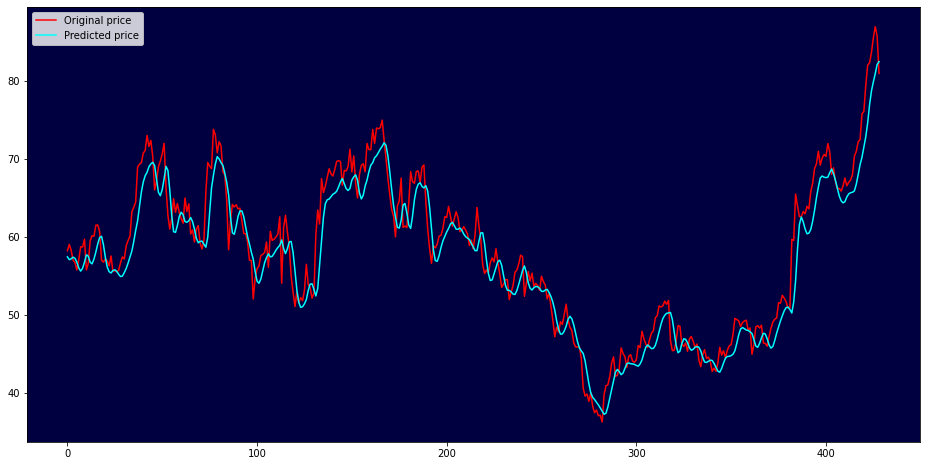

In [30]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()